In [1]:

import pandas as pd

df = pd.read_csv('/home/catpc/Desktop/spam /archive (9)/spam.csv', encoding='latin1')  
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [3]:
df = df.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df = df.rename(columns={'v1':'label'})

In [6]:
df.rename(columns={'v2': 'sms'}, inplace=True)


In [7]:
df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# binary encoding

In [8]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [9]:
df.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# cleaning Text

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import nltk


nltk.download('punkt_tab')  # যেটা error message-এ চেয়েছে
nltk.download('punkt')      # মূল tokenizer


[nltk_data] Downloading package punkt_tab to /home/catpc/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/catpc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def clean_text(text):
    
    
    #convert text to lowercase
    text = text.lower()
    
    #Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    
    #Remove Links
    text = re.sub(r'http\S+','',text)
    
    
    #Tokenize the text
    words =  word_tokenize(text)
    
    
    
    #Remove Stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    #new_list = [expression for item in old_list if condition]

    

    
    
    #Initialize PorterStemmer
    stemmer = PorterStemmer()

    #perform stemming
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    
    #join the stemmed words back into a single string 
    cleanned_text = ' '.join(stemmed_words)
    
    return cleanned_text
    
 



In [12]:

test_example = "This is my sms please check loving it  222223455 %345##$%# https://atik.com"
ans = clean_text(test_example)

In [13]:
print(ans)

sm pleas check love


In [14]:
df['clean_text'] = df['sms'].apply(lambda x: clean_text(x))

In [15]:
df.head()

,label,sms,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


# balance data 

<AxesSubplot: xlabel='label'>

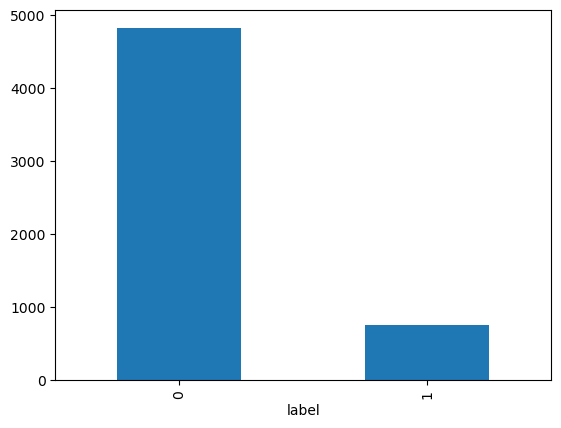

In [16]:
df['label'].value_counts().plot(kind='bar')

In [17]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
#assuming df is your DataFrame containig the data 
x = df.drop('label',axis=1) #features
y = df['label'] #target


#initialize the resampling techinque
oversampler = RandomOverSampler()

x_resampled, y_resampled = oversampler.fit_resample(x,y)




#create a new dataframe for the balanced dataset 
df_balanced = pd.DataFrame(x_resampled, columns=x.columns)

df_balanced['label'] = y_resampled

df_balanced['label'].value_counts()


label
0    4825
1    4825
Name: count, dtype: int64

# Train test split and Vectorization (TFIDF)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



#train - test split
x_train, x_test, y_train, y_test = train_test_split(df_balanced['clean_text'],df_balanced['label'],test_size=0.2,random_state=42)


#tf-idf vectorization
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)






In [19]:
x_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# model building and ensemble Learning

Random Forest Classifier


In [20]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix , classification_report


#random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_tfidf, y_train)

#prediction
y_pred = rf_classifier.predict(x_test_tfidf)


#confusion matrix and classification report
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)



print("confusion matrix:")
print(conf_matrix)
print("\nclassification report : ")
print(class_report)



confusion matrix:
[[984   1]
 [  0 945]]

classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_tfidf, y_train)

# Prediction
y_pred = rf_classifier.predict(x_test_tfidf)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Cross-validation (on training data)
cv_scores = cross_val_score(rf_classifier, x_train_tfidf, y_train, cv=5)

# Output
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Cross-validation scores: [0.99805699 0.99870466 0.99676166 1.         0.99352332]
Average cross-validation score: 0.9974093264248705

Confusion Matrix:
[[984   1]
 [  0 945]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(x_train_tfidf,y_train)

#prediction
y_pred_lr = lr_classifier.predict(x_test_tfidf)

#confusion matrix and classification report fro logistic regression 
conf_matrix_lr = confusion_matrix(y_test,y_pred_lr)
class_report_lr = classification_report(y_test,y_pred_lr)



print("Logistic Regression - confusion matrix :")
print(conf_matrix_lr)

print("\nLogistic Regression - classification report:")
print(class_report_lr)


Logistic Regression - confusion matrix :
[[975  10]
 [ 20 925]]

Logistic Regression - classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       985
           1       0.99      0.98      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



# SVM - Support Vector Machine

In [23]:
from sklearn.svm import SVC

#svm classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_train_tfidf,y_train)

#predictions
y_pred_svm = svm_classifier.predict(x_test_tfidf)


#confusion matrix and classification report for svm 
conf_matrix_svm = confusion_matrix(y_test,y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM - confusion matrix :")
print(conf_matrix_svm)
print("\nclasification report:")
print(class_report_svm)


SVM - confusion matrix :
[[981   4]
 [  3 942]]

clasification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



# Ensemble Learning

In [24]:
from sklearn.ensemble import VotingClassifier


#define the ensemble classifier with svm
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('logistic_regression', lr_classifier),
    ('svm', svm_classifier)
    
],voting='hard') #hard voting for a majority rule



#fit the ensemble classifier on tf-idf features
ensemble_classifier.fit(x_train_tfidf, y_train)

#predictions using ensemble classifier
y_pred_ensemble = ensemble_classifier.predict(x_test_tfidf)


#confusion matrix and classification report for ensemble classifier
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
class_report_ensemble = classification_report(y_test,y_pred_ensemble)


print("Ensemble Classifier - confusion matrix: ")
print(conf_matrix_ensemble)

print("\nensembel classifier - classification report: ")
print(class_report_ensemble)


Ensemble Classifier - confusion matrix: 
[[981   4]
 [  3 942]]

ensembel classifier - classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



In [25]:
#precision মডেল যেগুলোকে Positive বলেছে — তার মধ্যে কতগুলো আসলেই Positive ছিল?"

In [26]:
#recall আসল Positive গুলোর মধ্যে মডেল কতগুলো ধরতে পেরেছে

# Save files and load files

In [30]:
import pickle
pickle.dump(rf_classifier, open("model.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf.pkl",'wb'))

#Load the Random froest model
with open("model.pkl",'rb') as file:
    rf_classifier = pickle.load(file)

#load the tf-idf vectorizer
with open('tfidf.pkl','rb') as file:
    tfidf_vectorizer = pickle.load(file)
    

# Detection system 

In [49]:
def  predict_fake_or_real(text):
    cleaned_text = clean_text(text)
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    result = rf_classifier.predict(vectorized_text)
    return result[0]

In [51]:
#Example usage
input_text = "Congratulations! You've won a $1,000 gift card — click here to claim your prize now!!!"


prediction = predict_fake_or_real(input_text)
if prediction == 0:
    print("Real Message")
else :
    print("Fake Message")


Fake Message
